Connection to Coal Collection established

In [1]:
#Import packages
from pymongo import MongoClient
import snscrape.modules.twitter as sntwitter
import pandas as pd
from datetime import datetime

In [2]:
#Create connection to MongoDB
client = MongoClient()
db = client['GreenEnergy&Efficiency_Sentiments']
tickets = db['Coal Power']

Data written to dataframe

In [3]:
#Access MongoDB collection and insert into dataframe
results=tickets.find()
df=pd.DataFrame(data=results)
df

,_id,Datetime,Text,Likes,location,user,clean_text,composite_sentiment
0,626c7b65542099fa36e8c6a4,2011-12-30 18:12:02,@JKDudley23 @Verne_2011 coal power plants don'...,0,Cincinnati,benlester93,@JKDudley @Verne_ coal power plants don't blow...,-0.4847
1,626c7b65542099fa36e8c6a5,2011-12-30 17:36:50,Say Anything » North Dakota's Coal Power Lawsu...,0,,dakotanews,Say Anything » North Dakota's Coal Power Lawsu...,-0.2263
2,626c7b65542099fa36e8c6a6,2011-12-30 11:49:35,Tens of thousands of protesters in China block...,0,"London, Ontario",RJMcClelland,Tens of thousands of protesters in China block...,-0.5859
3,626c7b65542099fa36e8c6a7,2011-12-30 09:58:57,@Rufellen If you're on the A1 (which I suspect...,0,"West Yorks Urban Sprawl, UK",avon_deer,@Rufellen If you're on the A (which I suspect ...,-0.2960
4,626c7b65542099fa36e8c6a8,2011-12-30 08:30:22,North Dakota’s Coal Power Lawsuit Against Minn...,0,58104,58104,North Dakota’s Coal Power Lawsuit Against Minn...,-0.2263
...,...,...,...,...,...,...,...,...
139921,626c8af8542099fa36eb8051,2021-01-01 04:11:47,Most Cdns know that Trudeau’s Carbon tax is a ...,9,Alberta,rmillo4,Most Cdns know that Trudeau’s Carbon tax is a ...,0.3697
139922,626c8af8542099fa36eb8052,2021-01-01 03:07:38,"@jackcarey6 @chrislhayes You mean coal power, ...",0,Metro Detroit,TheOriginalDrZ,"@jackcarey @chrislhayes You mean coal power, d...",0.0000
139923,626c8af8542099fa36eb8053,2021-01-01 00:59:59,"Mitsui, one of Japan’s top trading houses, may...",42,Singapore,SStapczynski,"Mitsui, one of Japan’s top trading houses, may...",0.2023
139924,626c8af8542099fa36eb8054,2021-01-01 00:39:05,"@pinkcandyflos @MayorofLondon Dw, they got the...",2,"London, England",franz9752,"@pinkcandyflos @MayorofLondon Dw, they got the...",0.8360


Display number of Tweets per year

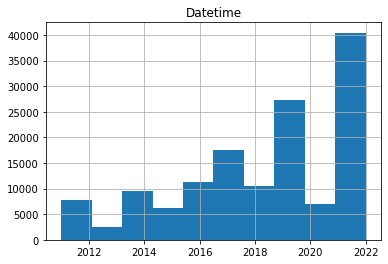

In [4]:
#Create historam of number of tweets per year
DateHist = df.hist('Datetime', bins=10)

Explore locations

In [5]:
loc_df=df.groupby('location').count()
loc_df.sort_values('_id',ascending=False)

,_id,Datetime,Text,Likes,user,clean_text,composite_sentiment
location,,,,,,,
,30423,30423,30423,30423,30423,30423,30423
Australia,3407,3407,3407,3407,3407,3407,3407
London,2111,2111,2111,2111,2111,2111,2111
Global,1360,1360,1360,1360,1360,1360,1360
India,1272,1272,1272,1272,1272,1272,1272
...,...,...,...,...,...,...,...
Khi- Naya Pakistan,1,1,1,1,1,1,1
Khulna,1,1,1,1,1,1,1
"Kiama, NSW gladly ex-Canberra",1,1,1,1,1,1,1


Create Dataframe to explore high sentiment Tweets

In [6]:
df_positive= df[df['composite_sentiment']>.5]

In [7]:
df_positive.sort_values('composite_sentiment')

,_id,Datetime,Text,Likes,location,user,clean_text,composite_sentiment
124151,626c8949542099fa36eb3a62,2021-06-20 17:50:44,Follow this simple rule\nnever love any fool. ...,0,,Abbas27402046,Follow this simple rule never love any fool. 🖤...,0.5003
21674,626c7dc6542099fa36e93aa3,2015-11-19 19:34:28,@Yes2Renewables I'm not a fan either. I love b...,0,LA & Melbourne,YESTERDAYSGUY,@YesRenewables I'm not a fan either. I love bi...,0.5003
87350,626c8578542099fa36ea9975,2019-05-03 19:37:08,Renewables beat coal power production in the U...,0,,ACAB696,Renewables beat coal power production in the U...,0.5003
101654,626c86f8542099fa36eada51,2021-12-07 16:11:36,"@Aaronsmith333 .\nI wonder, does this electora...",0,Coal & Wine Country AUSTRALIA,CoaltrainHunter,"@Aaronsmith . I wonder, does this electorate u...",0.5007
66064,626c8325542099fa36ea3443,2019-12-19 17:55:27,@Squill_whispers @my3monkees He thinks taking ...,2,,sgttag,@Squill_whispers @mymonkees He thinks taking e...,0.5007
...,...,...,...,...,...,...,...,...
118981,626c88c0542099fa36eb23f7,2021-08-13 12:10:27,Growth still priority for China with increase ...,3,Out there,NeoDroid,Growth still priority for China with increase ...,0.9876
113250,626c8825542099fa36eb0b55,2021-09-29 19:17:17,❤❤❤❤❤❤❤❤ #coalpower #fuckgreta https://t.co/OS...,0,,Cryptopump2W,❤❤❤❤❤❤❤❤ #coalpower #fuckgreta,0.9887
121936,626c890d542099fa36eb3095,2021-07-12 21:08:35,There is a massive pipeline underway in Minnes...,1,pixie hollow🍄🌞🌿✨🧚🏻,valntynebetch,There is a massive pipeline underway in Minnes...,0.9894
102397,626c870b542099fa36eadd66,2021-11-27 23:44:11,@thehill @Sen_JoeManchin .@Sen_JoeManchin on c...,8,"Lafayette, LA",REFrankel,@thehill @Sen_JoeManchin .@Sen_JoeManchin on c...,0.9912


Add year field derrived from timestamp

In [8]:
import datetime
df_positive['year'] = pd.DatetimeIndex(df_positive['Datetime']).year
df_positive

C:\Users\Schry\AppData\Local\Temp/ipykernel_20664/765089195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive['year'] = pd.DatetimeIndex(df_positive['Datetime']).year


,_id,Datetime,Text,Likes,location,user,clean_text,composite_sentiment,year
8,626c7b65542099fa36e8c6b0,2011-12-29 22:58:08,These eight power stations combined will seemi...,0,"Queensland, AU & Worldwide",Coaltopia,These eight power stations combined will seemi...,0.5994,2011
11,626c7b65542099fa36e8c6b4,2011-12-29 17:41:29,Crushers Devote to Transformation of Low Carbo...,0,United States,EMarkBusiness,Crushers Devote to Transformation of Low Carbo...,0.7184,2011
16,626c7b65542099fa36e8c6ba,2011-12-29 07:45:11,Australia should apply tough planning regs on ...,0,Melbourne,takvera,Australia should apply tough planning regs on ...,0.5994,2011
31,626c7b65542099fa36e8c6c9,2011-12-27 16:43:59,China Shenhua Energy signed an agreement to bu...,0,Middle East,Greenator,China Shenhua Energy signed an agreement to bu...,0.5687,2011
109,626c7b68542099fa36e8c723,2011-12-22 18:30:06,"EPA, Coal Power Plants, EPA, HOLIDAYS! http://...",0,"330 N Hubbards Ln, Louisville",KWAlliance,"EPA, Coal Power Plants, EPA, HOLIDAYS!",0.5610,2011
...,...,...,...,...,...,...,...,...,...
139909,626c8af8542099fa36eb8045,2021-01-01 11:58:44,".. And probably more importantly, last year #c...",3,"Margate, England",EVMaps,".. And probably more importantly, last year #c...",0.5709,2021
139911,626c8af8542099fa36eb8047,2021-01-01 10:57:06,Stream starting in 45 minutes (or less) (CEST ...,1,,sparlexna,Stream starting in minutes (or less) (CEST :) ...,0.6022,2021
139915,626c8af8542099fa36eb804b,2021-01-01 07:56:17,@AdaniKaran #HappyNewYear to you too!\n\nI'm s...,0,Australia,euug,@AdaniKaran #HappyNewYear to you too! I'm stil...,0.5242,2021
139924,626c8af8542099fa36eb8054,2021-01-01 00:39:05,"@pinkcandyflos @MayorofLondon Dw, they got the...",2,"London, England",franz9752,"@pinkcandyflos @MayorofLondon Dw, they got the...",0.8360,2021


Explore tweets and users for tweets created in the years with the spike in sentiments

In [9]:
df_19_21_Pos= df_positive[df_positive['year']>2018]
df_19_21_Pos

,_id,Datetime,Text,Likes,location,user,clean_text,composite_sentiment,year
65216,626c8310542099fa36ea308f,2019-12-30 23:08:58,My solar wish (and hope) for 2020 and beyond i...,0,"Waterloo, Ontario",SolarCathy,My solar wish (and hope) for and beyond is tha...,0.9501,2019
65225,626c8310542099fa36ea3098,2019-12-30 20:50:35,"@Tav_assoli @davidsirota Yes, China will shut ...",1,Vancouver,Ptcwang,"@Tav_assoli @davidsirota Yes, China will shut ...",0.8987,2019
65226,626c8310542099fa36ea3099,2019-12-30 20:50:02,Despite the climate crisis: Several countries ...,2,Vancouver,Angela_Mining,Despite the climate crisis: Several countries ...,0.5096,2019
65230,626c8310542099fa36ea309d,2019-12-30 19:32:42,I am on a road trip to Galveston and wow has i...,4,"New York, NY",kirst_nicole,I am on a road trip to Galveston and wow has i...,0.5859,2019
65236,626c8310542099fa36ea30a3,2019-12-30 17:40:54,@homemadeguitars I agree. Making those things ...,3,,ResistsBob,@homemadeguitars I agree. Making those things ...,0.8020,2019
...,...,...,...,...,...,...,...,...,...
139909,626c8af8542099fa36eb8045,2021-01-01 11:58:44,".. And probably more importantly, last year #c...",3,"Margate, England",EVMaps,".. And probably more importantly, last year #c...",0.5709,2021
139911,626c8af8542099fa36eb8047,2021-01-01 10:57:06,Stream starting in 45 minutes (or less) (CEST ...,1,,sparlexna,Stream starting in minutes (or less) (CEST :) ...,0.6022,2021
139915,626c8af8542099fa36eb804b,2021-01-01 07:56:17,@AdaniKaran #HappyNewYear to you too!\n\nI'm s...,0,Australia,euug,@AdaniKaran #HappyNewYear to you too! I'm stil...,0.5242,2021
139924,626c8af8542099fa36eb8054,2021-01-01 00:39:05,"@pinkcandyflos @MayorofLondon Dw, they got the...",2,"London, England",franz9752,"@pinkcandyflos @MayorofLondon Dw, they got the...",0.8360,2021


In [10]:
import datetime
user_df = df_19_21_Pos.groupby('user').count()
user_df

,_id,Datetime,Text,Likes,location,clean_text,composite_sentiment,year
user,,,,,,,,
01DeltaT,1,1,1,1,1,1,1,1
01Water,3,3,3,3,3,3,3,3
0Sundance,1,1,1,1,1,1,1,1
0ThatGuyTM,1,1,1,1,1,1,1,1
0xFFFF_coffee,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
zorcman,1,1,1,1,1,1,1,1
zozzer1966,1,1,1,1,1,1,1,1
zpaulaf,1,1,1,1,1,1,1,1


In [11]:
Pos_User_df=user_df.sort_values('_id',ascending=False)
Pos_User_df

,_id,Datetime,Text,Likes,location,clean_text,composite_sentiment,year
user,,,,,,,,
EmberClimate,63,63,63,63,63,63,63,63
tmcmahon21,54,54,54,54,54,54,54,54
simonahac,42,42,42,42,42,42,42,42
chrislittlecott,33,33,33,33,33,33,33,33
ISalutem,33,33,33,33,33,33,33,33
...,...,...,...,...,...,...,...,...
Motorlogg,1,1,1,1,1,1,1,1
MousamiPrasad,1,1,1,1,1,1,1,1
Moyne1976,1,1,1,1,1,1,1,1


In [12]:
Pos_User_df.to_csv(r'C:\Users\Schry\Documents\MSDS696\Documents\coal.csv')